In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

## 지역별 인구증가율과 고령인구비율 시각화

In [2]:

city = ['인천', '서울',   '경기', '강원','충남',' 세종', '충북', '경북', '전북', '대전',' 대구', '울산', '전남', '광주', '경남','부산', '제주']
population_inc = [0.3,   -0.78,   1.26,  0.03,  1.11, 15.17,  0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27,  0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75,  17.52,  9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

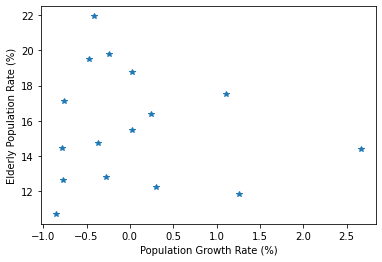

In [84]:
plt.plot(population_inc, population_old, '*') # 'bo', '^', '--'
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

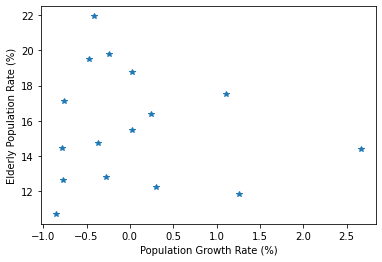

In [20]:
# drop outlier
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'*')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

[0.3, -0.78, 1.26, 0.03, 1.11]

In [18]:
population_inc[6:]

[0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]

In [30]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]


# mean
x_bar = np.sum(X) / len(X)
y_bar = np.sum(Y) / len(Y)


# covariance 
Sxy = np.sum( (Y - y_bar) *  (X - x_bar) ) # Sxy
Sxx = np.sum((X - x_bar)**2) # Sxx
a = Sxy / Sxx 

b = y_bar - a * x_bar
print('a : ', a, 'b : ',b)

a :  -0.3558341479154609 b :  15.6693177439713


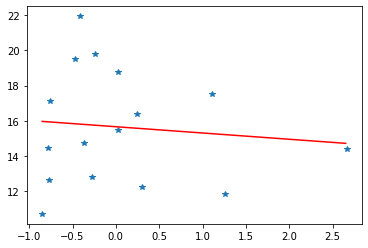

In [37]:
line_x = np.arange(min(X), max(X), 0.1)
line_y = a*line_x + b

plt.plot(X, Y, '*')
plt.plot(line_x, line_y, color = 'red')
plt.show()

In [45]:
import tensorflow as tf
import random
import numpy as np

a :  6.515059 b :  7.0631404 loss :  68.9826
a :  10.791654 b :  11.339735 loss :  14.760044
a :  13.099587 b :  13.647669 loss :  2.0534163
a :  14.065579 b :  14.613661 loss :  0.18038698
a :  14.377154 b :  14.925236 loss :  0.0099030025
a :  14.454953 b :  15.003035 loss :  0.00033529577
a :  14.469993 b :  15.018074 loss :  6.831238e-06
a :  14.472225 b :  15.020307 loss :  8.029316e-08
a :  14.472478 b :  15.020559 loss :  3.8454928e-10
a :  14.472483 b :  15.020564 loss :  2.2382451e-10


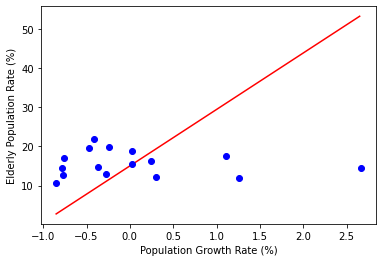

In [66]:
# tensorflow 로 구현한 simple linear regression
# a와 b를 랜덤한 값으로 초기화
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

a = tf.Variable(random.random())
b = tf.Variable(random.random())


def compute_loss():
    y_pred = a*X + b
    loss = tf.reduce_mean( Y - y_pred )**2 # MSE
    return loss


optim = tf.keras.optimizers.Adam(lr = 0.07)
for i in range(1000):
    optim.minimize(compute_loss, var_list = [a, b])
    
    if i % 100 == 99:
        print('a : ', a.numpy() , 'b : ', b.numpy(), 'loss : ', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a:3.9729688:b:-5.789588:c:6.5465474:loss:67.566376
a:2.7911415:b:-4.533954:c:10.325056:loss:31.322803
a:1.2751861:b:-2.2746177:c:12.941767:loss:15.99995
a:0.319989:b:-0.84604913:c:14.578951:loss:10.972128
a:-0.1901301:b:-0.083489716:c:15.455216:loss:9.727932
a:-0.4252674:b:0.26797968:c:15.859293:loss:9.493757
a:-0.51914644:b:0.40830338:c:16.02063:loss:9.460122
a:-0.5516589:b:0.45690012:c:16.076508:loss:9.456437
a:-0.5614164:b:0.47148517:c:16.093275:loss:9.456131
a:-0.5639452:b:0.47526425:c:16.097622:loss:9.456111


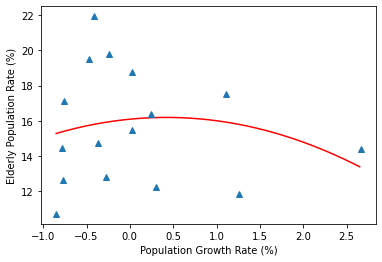

In [77]:
# tensorflow 로 구현한 polynomial regression

x = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

def loss_function():
    y_pred = a * x*x + b * x + c 
    loss = tf.reduce_mean((y -  y_pred )**2)
    return loss


optim = tf.keras.optimizers.Adam(lr = 0.07) # a, b, c를 계속 바꿔가면서 computing


for i in np.arange(1000):
    optim.minimize(loss_function, var_list = [a, b, c])

    if i % 100 == 99:
        print('a',a.numpy() , 'b', b.numpy(), 'c', c.numpy(), 'loss', loss_function().numpy(), sep = ':')

line_x = np.arange(min(x), max(x), 0.01)
line_y = a * line_x * line_x + b * line_x + c 

plt.plot(line_x, line_y, 'r-')
plt.plot(x, y, '^')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a -1.3778725 b 6.3093147 c -3.7613528 d 6.769722 loss 57.659187
a -2.0440834 b 6.836048 c -2.023183 d 10.219481 loss 29.1774
a -1.5842973 b 4.82796 c -0.8473841 d 12.33555 loss 19.09292
a -0.78905296 b 2.3886442 c -0.55145246 d 13.834259 loss 13.470337
a -0.0774442 b 0.31334335 c -0.46911776 d 14.955228 loss 10.422472
a 0.4581122 b -1.235442 c -0.42898056 d 15.77087 loss 8.961304
a 0.8277365 b -2.3028646 c -0.40370414 d 16.330336 loss 8.34246
a 1.065759 b -2.9900239 c -0.3877622 d 16.69007 loss 8.1104965
a 1.2092693 b -3.4042938 c -0.3782071 d 16.906864 loss 8.033532
a 1.2903398 b -3.6383142 c -0.37281844 d 17.029325 loss 8.01095


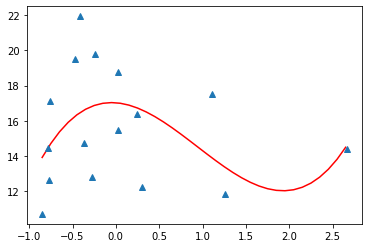

In [81]:
# tensorflow 를 사용해서 3차 식 만들기

x = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]



a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())



def loss_function():
    y_pred = a * x * x * x + b * x * x + c * x + 1 * d 
    loss = tf.reduce_mean( ( y - y_pred )**2 )
    return loss 

optim = tf.keras.optimizers.Adam(lr = 0.07)

for i in np.arange(1000):
    optim.minimize(loss_function, var_list = [a, b, c, d])

    if i % 100 == 99:
        print('a', a.numpy(), 'b', b.numpy(), 'c', c.numpy(), 'd', d.numpy(), 'loss', loss_function().numpy())


line_x = np.arange(min(x), max(x), 0.1)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + 1 * d 

plt.plot(line_x, line_y, 'r-')
plt.plot(x, y, '^')
plt.show()